In [1]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

age_data_url="AgeGroupDetails.csv"
age_data=pd.read_csv(age_data_url, index_col="Sno")

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
covid19-in-india.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-in-india.zip
replace AgeGroupDetails.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [12]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
age_data_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/AgeGroupDetails.csv"
age_data=pd.read_csv(age_data_url, index_col="Sno")
"""

'\nage_data_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/AgeGroupDetails.csv"\nage_data=pd.read_csv(age_data_url, index_col="Sno")\n'

In [13]:
age_data

,AgeGroup,TotalCases,Percentage
Sno,,,
1,0-9,22,3.18%
2,10-19,27,3.90%
3,20-29,172,24.86%
4,30-39,146,21.10%
5,40-49,112,16.18%
6,50-59,77,11.13%
7,60-69,89,12.86%
8,70-79,28,4.05%
9,>=80,10,1.45%


Text(0, 0.5, 'Total no. of cases')

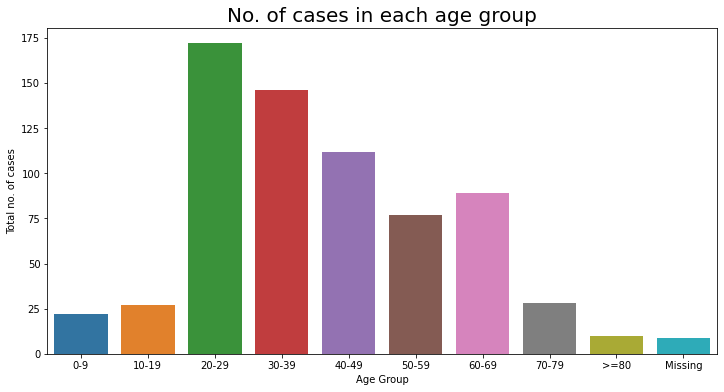

In [14]:
#Bar_Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x="AgeGroup", y="TotalCases", data=age_data)
plt.title("No. of cases in each age group",fontsize=20)
plt.xlabel("Age Group")
plt.ylabel("Total no. of cases")

In [15]:
NumericPercentage = [float(i.strip('%')) for i in age_data.Percentage]
NumericPercentage

[3.18, 3.9, 24.86, 21.1, 16.18, 11.13, 12.86, 4.05, 1.45, 1.3]

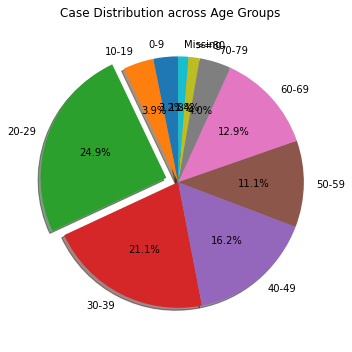

In [16]:
# Pie chart
labels = age_data.AgeGroup
sizes = NumericPercentage
explode = (0, 0, 0.1, 0, 0,0,0,0,0,0)  
fig1, ax1 = plt.subplots()
fig1.set_figheight(5)
fig1.set_figwidth(5)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Case Distribution across Age Groups")
plt.tight_layout()
plt.show()